In [33]:
import numpy as np
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
#%matplotlib inline

## Introduction: The Root

In [36]:
show directory

SyntaxError: invalid syntax (1771876209.py, line 1)

In [35]:
#Import our files

#Power Working Directory with the files in it
PWD = '/biodata/dep_coupland/grp_formosa/rpaus/Day 5 Leaves CENH3'


#Import CSV Files: As a numpy array and as a pandas data frame
NucleiNumpy = np.genfromtxt('Day5_Leaf_CENH3_02_1024x1024_40x_N11_Channel=0_data_table.csv'.format(PWD), delimiter=',',skip_header=1)
NucleiPd = pd.read_csv('Day5_Leaf_CENH3_02_1024x1024_40x_N11_Channel=0_data_table.csv'.format(PWD), sep=',',header=0)

#the color scheme for plotting that we will use
colors = ['#648FFF','#785EF0','#DC267F','#FE6100','#FFB000'] #Using IBM Colorblind Scheme 

FileNotFoundError: Day5_Leaf_CENH3_02_1024x1024_40x_N11_Channel=0_data_table.csv not found.

Let us first look at all of the columns in the CSV file. We can use the pandas data frame to easily see this using the following command.

In [4]:
list(NucleiPd.columns)

['object_id',
 'timestep',
 'labelimage_oid',
 'User Label',
 'Predicted Class',
 'Probability of Root Cap',
 'Probability of Transition Zone',
 'Defect Center_0',
 'Defect Center_1',
 'Defect Center_2',
 'Object Center_0',
 'Object Center_1',
 'Object Center_2',
 'Kurtosis of Defect Area',
 'Object Area',
 'Mean Defect Displacement',
 'Mean Defect Area',
 'Convex Hull Center_0',
 'Convex Hull Center_1',
 'Convex Hull Center_2',
 'Variance of Defect Area',
 'Number of Defects',
 'Skewness of Defect Area',
 'Convex Hull Area',
 'Convexity',
 'Bounding Box Maximum_0',
 'Bounding Box Maximum_1',
 'Bounding Box Maximum_2',
 'Radii of the object_0',
 'Radii of the object_1',
 'Radii of the object_2',
 'Total Intensity',
 'Maximum intensity',
 'Size in pixels',
 'Variance of Intensity',
 'Principal components of the object_0',
 'Principal components of the object_1',
 'Principal components of the object_2',
 'Principal components of the object_3',
 'Principal components of the object_4',
 'P

There's a lot of them! If we selected all of the features in ilastik, we would obtain 196 columns. Feel free to explore all of them if you would like, but there are several that are most important for our work now: "Total Intensity", "Size in pixels", and "Predicted Class". The last one, "Predicted Class", is to let us differentiate between the predicted classes we used in the Object Classification. 

Let us easily find the indices for the columns that these three are in. 

In [12]:
colInt = list(NucleiPd.columns).index("Total Intensity")
colSize = list(NucleiPd.columns).index("Size in pixels")
colClass = list(NucleiPd.columns).index("Predicted Class")
print(colInt)
print(colSize)
print(colClass)

31
33
4


Now, we can extract the intensities and sizes into numpy arrays. As well, we will collect all of the indicies which have been identified as the root cap or in the transition zone. 

In [6]:
TotIntens = NucleiNumpy[:,colInt]
Sizes = NucleiNumpy[:,colSize]
Concentrations = TotIntens/Sizes
ValsRoot = [i for i in range(len(TotIntens)) if NucleiPd.iloc[i,colClass] == 'Root Cap']
ValsTran = [i for i in range(len(TotIntens)) if NucleiPd.iloc[i,colClass] == 'Transition Zone']

Firstly, let's get some data about the volumes, intensities, and concentrations. In the below, we will plot 3 side-by-side box plots showing the differences between the two classes. Comment on what you find. 

In [30]:
import IPython

Text(0, 0.5, 'Concentrations')

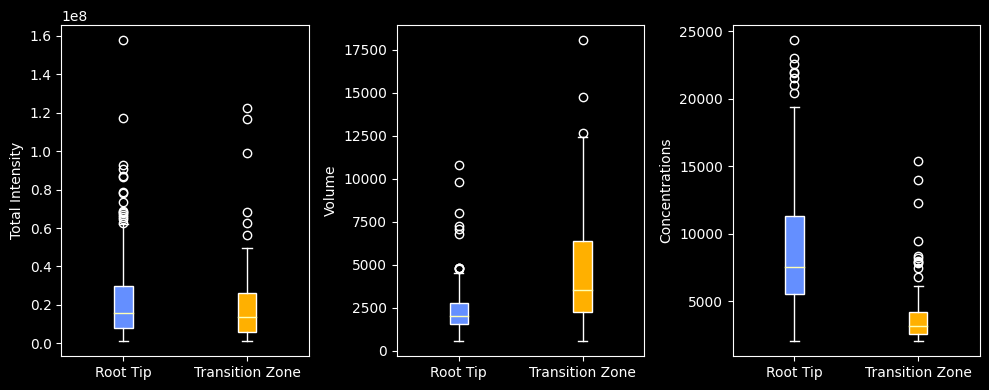

In [32]:
fig, ax = plt.subplots(1,3, figsize=(10,4), tight_layout = True)

#If you would like to have a dark background, uncomment below
plt.style.use("dark_background")
colorsb = [colors[0],colors[4]]
labels = ['Root Tip','Transition Zone']

boxplot0 = ax[0].boxplot([TotIntens[ValsRoot],TotIntens[ValsTran]],
                         notch=False,patch_artist = True,labels=labels)
boxplot1 = ax[1].boxplot([Sizes[ValsRoot],Sizes[ValsTran]],
                         notch=False,patch_artist = True,labels=labels)
boxplot2 = ax[2].boxplot([Concentrations[ValsRoot],Concentrations[ValsTran]],
                         notch=False,patch_artist = True,labels=labels)


for boxes in (boxplot0,boxplot1,boxplot2):
    for patch, color in zip(boxes['boxes'],colorsb):
        patch.set_facecolor(color)

#boxplot0['boxes'][0].set_facecolor(colorsb[0])
#boxplot0['boxes'][1].set_facecolor(colorsb[1])
#boxplot1['boxes'][0].set_facecolor(colorsb[0])
#boxplot1['boxes'][1].set_facecolor(colorsb[1])
#boxplot2['boxes'][0].set_facecolor(colorsb[0])
#boxplot2['boxes'][1].set_facecolor(colorsb[1])


ax[0].set_ylabel('Total Intensity')
ax[1].set_ylabel('Volume')
ax[2].set_ylabel('Concentrations')
#plt.savefig('Figure1.png')

We looked a bit more generally at the data, but now let us look more closely at each individual cell. Here, we will create a scatter plot which shows the relationship between intensity and volume.

<IPython.core.display.Javascript object>


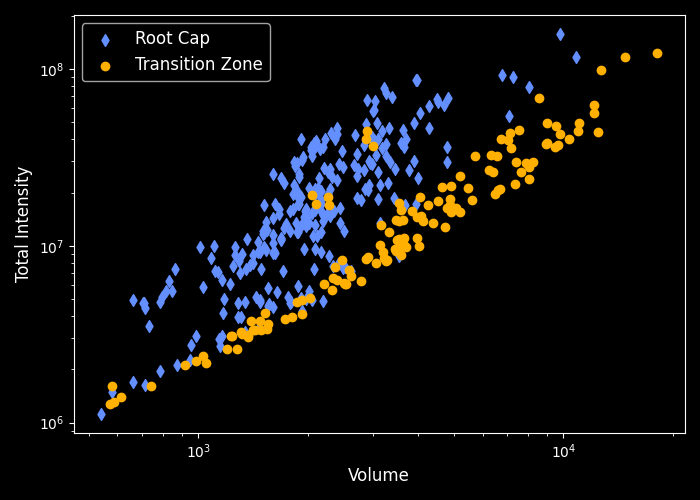

In [111]:
fig, ax = plt.subplots(figsize=(7,5), tight_layout = True)

#If you would like to have a dark background, uncomment below
plt.style.use('dark_background')

ax.scatter(Sizes[ValsRoot],TotIntens[ValsRoot],color=colors[0],marker='d',label='Root Cap')
ax.scatter(Sizes[ValsTran],TotIntens[ValsTran],color=colors[4],marker='o',label='Transition Zone')
ax.set_xlabel('Volume',fontsize=12)
ax.set_ylabel('Total Intensity',fontsize=12)

#Explore the different log bases and see if you can find other relationships
ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)

ax.legend(fontsize=12)
#Save the figure by removing the # sign below and renaming it. 


#plt.savefig('Figure1.png')

<IPython.core.display.Javascript object>


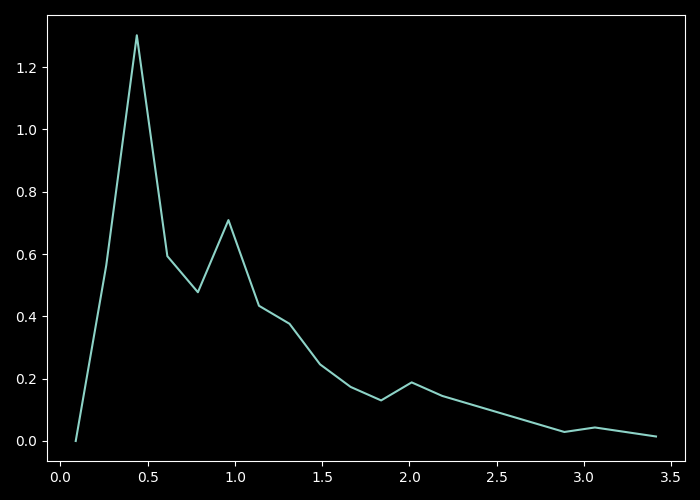

In [116]:
fig, ax = plt.subplots(figsize=(7,5), tight_layout = True)

A, B = np.histogram(Concentrations/np.mean(Concentrations),bins=20,range=(0,3.5),density=True)

plt.plot((B[1:]+B[:-1])/2,A)

<IPython.core.display.Javascript object>


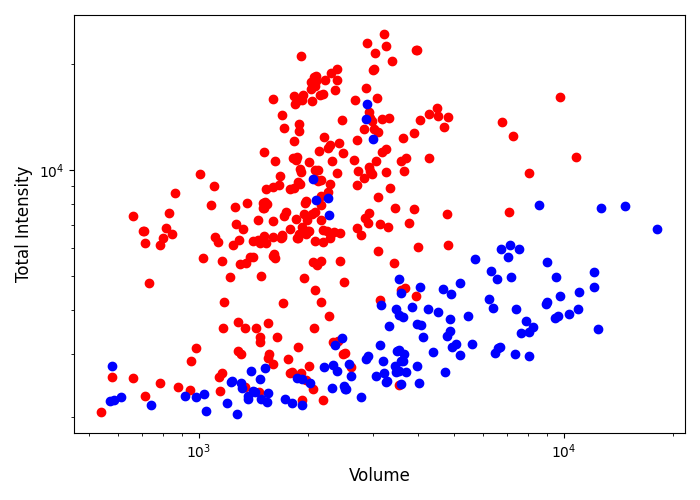

In [66]:
fig, ax = plt.subplots(figsize=(7,5), tight_layout = True)
Concentrations = TotIntens/Sizes
ax.scatter(Sizes[ValsRoot],Concentrations[ValsRoot],color='red')
ax.scatter(Sizes[ValsTran],Concentrations[ValsTran],color='blue')
ax.set_xlabel('Volume',fontsize=12)
ax.set_ylabel('Total Intensity',fontsize=12)

ax.set_yscale('log')
ax.set_xscale('log')

#Save the figure by removing the # sign below and renaming it. 

#plt.savefig('Figure1.png')

In [61]:
Concentrations = Intensities/Volumes

<IPython.core.display.Javascript object>


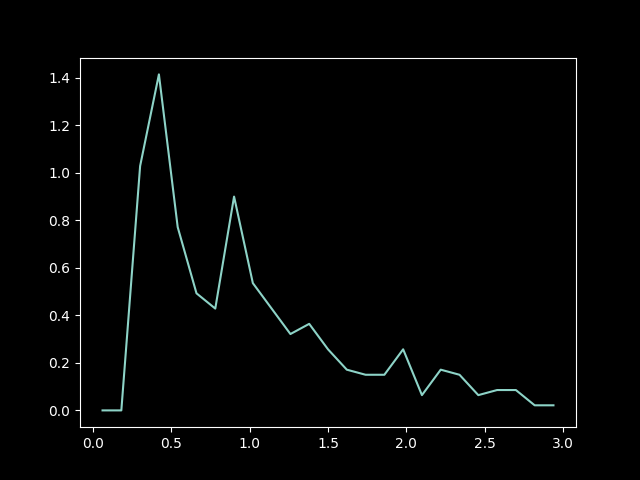

In [115]:
plt.figure()
A, B = np.histogram(Concentrations/np.mean(Concentrations),bins=25,range=(0,3),density=True)
plt.plot((B[1:]+B[:-1])/2,A)

In [118]:
ValsConcSmall = [i for i in range(len(TotIntens)) if Concentrations[i]/np.mean(Concentrations) < 0.75]
ValsConcMed = [i for i in range(len(TotIntens)) if Concentrations[i]/np.mean(Concentrations) > 0.75 and 
               Concentrations[i]/np.mean(Concentrations) < 1.5]
ValsConcLarge = [i for i in range(len(TotIntens)) if Concentrations[i]/np.mean(Concentrations) > 1.5]

<IPython.core.display.Javascript object>


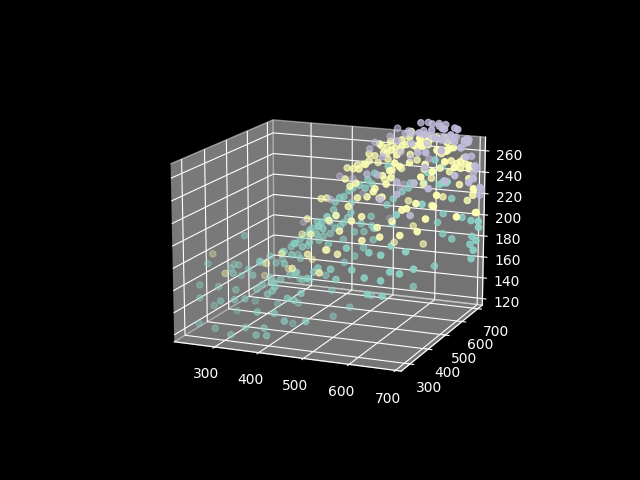

In [130]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

headX = list(NucleiPd.columns).index('Object Center_0')
headY = list(NucleiPd.columns).index('Object Center_1')
headZ = list(NucleiPd.columns).index('Object Center_2')

ax.scatter(NucleiNumpy[ValsConcSmall,headX],NucleiNumpy[ValsConcSmall,headY],NucleiNumpy[ValsConcSmall,headZ])
ax.scatter(NucleiNumpy[ValsConcMed,headX],NucleiNumpy[ValsConcMed,headY],NucleiNumpy[ValsConcMed,headZ])
ax.scatter(NucleiNumpy[ValsConcLarge,headX],NucleiNumpy[ValsConcLarge,headY],NucleiNumpy[ValsConcLarge,headZ])

#plt.scatter(NucleiNumpy[ValsConcMed,headY],NucleiNumpy[ValsConcMed,headZ])
#plt.scatter(NucleiNumpy[ValsConcLarge,headY],NucleiNumpy[ValsConcLarge,headZ])

In [36]:
Membrane = np.load('{0}/Root_Membrane-channel0_Multicut Segmentation.npy'.format(PWD))[:,:,:,0]

In [37]:
np.shape(Membrane)

(406, 1024, 1024)

In [38]:
Membrane

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 